In [194]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import tensorflow as tf

In [195]:
# Модуль отображения потерь лежит тут !
#https://github.com/stared/livelossplot 
# график потерь 
from livelossplot import PlotLossesKeras

файла data.txt. В нём есть 8 фич, а последний столбец показывает принадлежность классу

In [196]:
# загружаем данные с фичами
dataset = np.loadtxt("data.txt", delimiter=",")
# Первые 8 столбцов в примере отвечают за фичи, последний же за класс, разбиваем 
X = dataset[:,0:8]
Y = dataset[:,8]



In [197]:
#данные 
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [198]:
# маркировка 
print(Y)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

In [199]:
# Создаём модель
model = Sequential()
# Добавляем первый слой Dense, первое число 12 - это количество нейронов, 
# input_dim - количество фич на вход
# activation -  функция активации, полулинейная функция max(x, 0) 
# именно полулинейные функции позволяют получать нелинейные результаты с минимальными затратами
model.add(Dense(8, input_dim=8, activation='relu'))
# добавляем второй слой с 12ю нейронами
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))

#выходной слой
model.add(Dense(1, activation='sigmoid'))


# на выходе при бинарной классификации, функцию активации чаще всего используют sigmoid , реже softmax
# Компилирование модели. binary_crossentropy - опять же не случайно, а т.к. у нас два класса.
# Метрика accuracy используется практически для всех задач классификации
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [200]:
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_117 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_118 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None


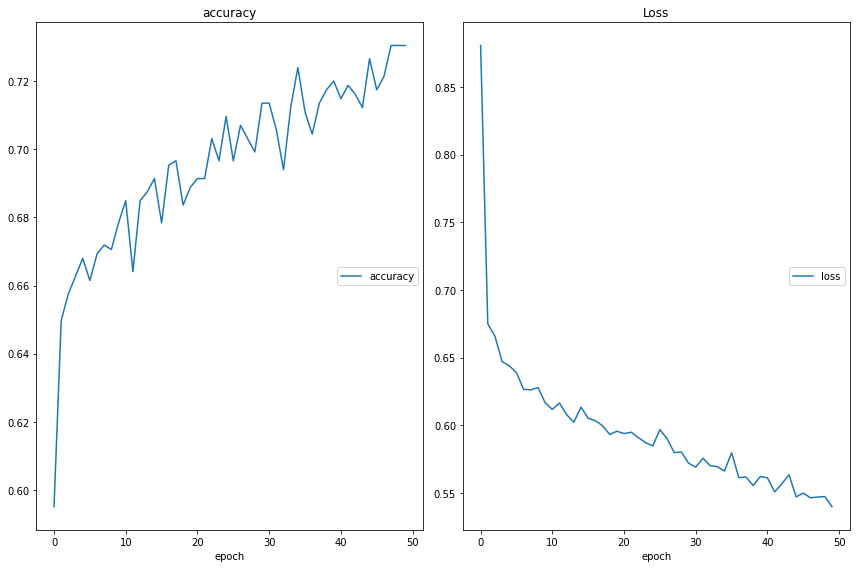

accuracy
	accuracy         	 (min:    0.595, max:    0.730, cur:    0.730)
Loss
	loss             	 (min:    0.540, max:    0.881, cur:    0.540)


In [201]:
# Наконец дошли до обучения модели, X и Y - понятно, 
# epoch - максимальное количество эпох до остановки
# batch_size - сколько объектов будет загружаться за итерацию
model.fit(X, Y,           
          callbacks=[PlotLossesKeras()],
          epochs=50, 
          batch_size=10,  
          verbose=2)


Графически отображает процесс обучение сети, очень удобно для понимания

можно играть слоями и смотреть что получается

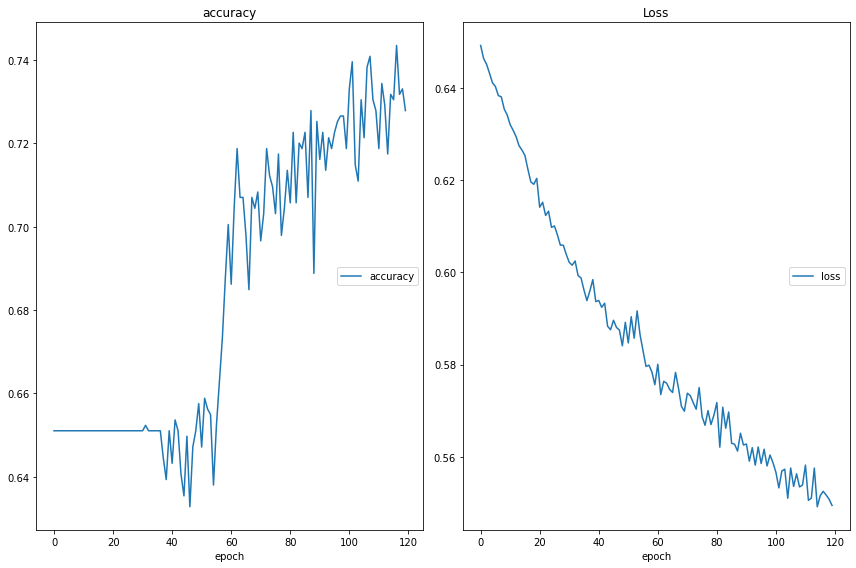

accuracy
	accuracy         	 (min:    0.633, max:    0.743, cur:    0.728)
Loss
	loss             	 (min:    0.549, max:    0.649, cur:    0.549)


In [202]:
model_2 = Sequential()

model_2.add(Dense(12, input_dim=8, activation='relu'))
model_2.add(Dense(8, activation='sigmoid'))
model_2.add(Dense(6, activation='sigmoid'))
model_2.add(Dense(4, activation='relu'))

#выходной слой
model_2.add(Dense(1, activation='sigmoid'))


model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_2.fit(X, Y,           
          callbacks=[PlotLossesKeras()],
          epochs=120, 
          batch_size=10,  
          verbose=2)


# если запустить ячеку будет рабоать долго

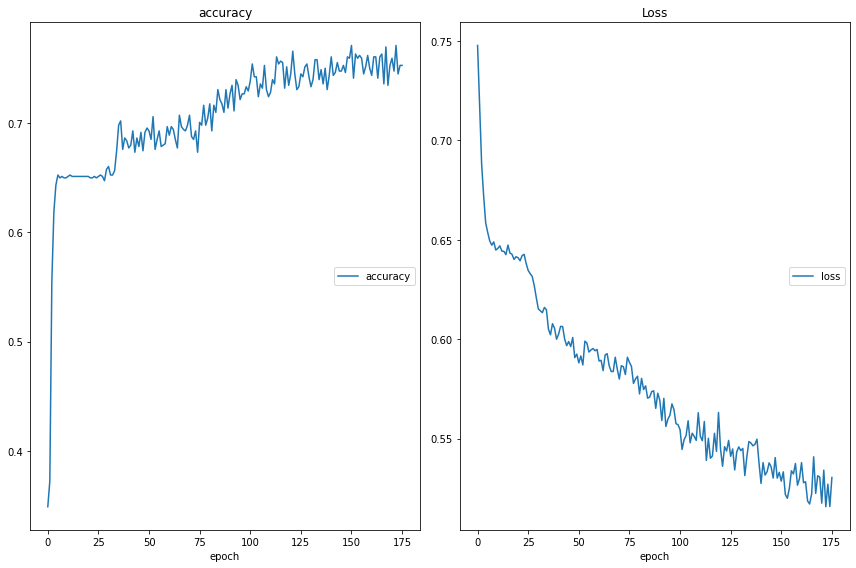

accuracy
	accuracy         	 (min:    0.349, max:    0.771, cur:    0.753)
Loss
	loss             	 (min:    0.516, max:    0.748, cur:    0.530)
Epoch 177/400
16/16 - 0s - loss: 0.5188 - accuracy: 0.7591


In [ ]:
model_3 = Sequential()
model_3.add(Dense(6, activation='relu'))
model_3.add(Dense(24, activation='sigmoid'))
model_3.add(tf.keras.layers.Dropout(0.1, noise_shape=None, seed=None))
model_3.add(Dense(12, activation='relu'))
model_3.add(tf.keras.layers.Dropout(0.1, noise_shape=None, seed=None))
model_3.add(Dense(12, activation='relu'))
model_3.add(tf.keras.layers.Dropout(0.1, noise_shape=None, seed=None))
model_3.add(Dense(4, activation='sigmoid'))

#выходной слой
model_3.add(Dense(1, activation='sigmoid'))


model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_3.fit(X, Y,           
          callbacks=[PlotLossesKeras()],
          epochs=400, 
          batch_size=50,  
          verbose=2)


In [ ]:
# Предсказание
predictions = model.predict(X)

In [ ]:
# 2,122,70,27,0,36.8,0.340,27,0
# строку я стянул из того же файла, просто для примера 

test  = [[2, 122, 70, 27, 0, 36.8, 0.340, 27]]

In [ ]:
 #print(predictions)

In [ ]:
predictions = model.predict(test)
predictions_2 = model_2.predict(test)
predictions_3 =  model_3.predict(test)

In [ ]:
# если я все сделал правильно, то это предсказание для выбранной строки

print(predictions)
print(predictions_2)
print(predictions_3)